In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Data Cleaning...

In [3]:
data = pd.read_csv('D:\cancer_diagnosis\data2.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

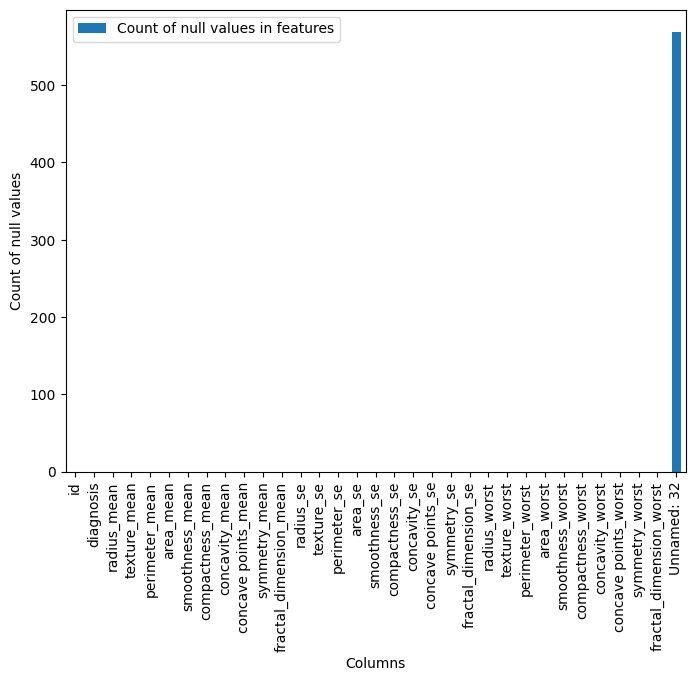

In [5]:
null_feat = pd.DataFrame(data.isnull().sum(), columns = ['Count of null values in features'])

# Plot the Series as a bar plot
null_feat.plot(kind="bar", figsize=(8,6))

# Add x and y axis labels
plt.xlabel('Columns')
plt.ylabel('Count of null values')

# Show the plot
plt.show()

None of the columns in the dataset haven't nnull values except "Unnamed: 32" 

In [6]:
data = data.drop('Unnamed: 32',axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
print("unique values in data column ID",len(set(data.id)))

unique values in data column ID 569


In [9]:
data = data.drop('id',axis=1)

In [10]:
data["diagnosis"]=data["diagnosis"].apply(lambda x: 'Malignant' if (x=='M') else 'Benign')

In [11]:
pd.DataFrame(data.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
counts = data.diagnosis.value_counts()

fig = px.bar(counts, x=counts.values, y=counts.index, orientation='h', color = counts.index)
fig.update_layout(width=800, height=350)

# Set the chart title and axis labels
fig.update_layout(title='Diagnosis Value Counts', xaxis_title='Count', yaxis_title='[ B Bening, M Malignant ]')

# Show the chart
fig.show()

In [13]:
fig = px.pie(counts, values=counts.values, names=counts.index, color = counts.index)
fig.update_layout(width=450, height=400)

# Set the chart title and axis labels
fig.update_layout(title='Diagnosis Distribution [ B Bening, M Malignant ]')

# Show the chart
fig.show()


# Data Analysis

In [14]:
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,Malignant,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [15]:
q = data.columns

**Plot Histogram and Density of each feature**

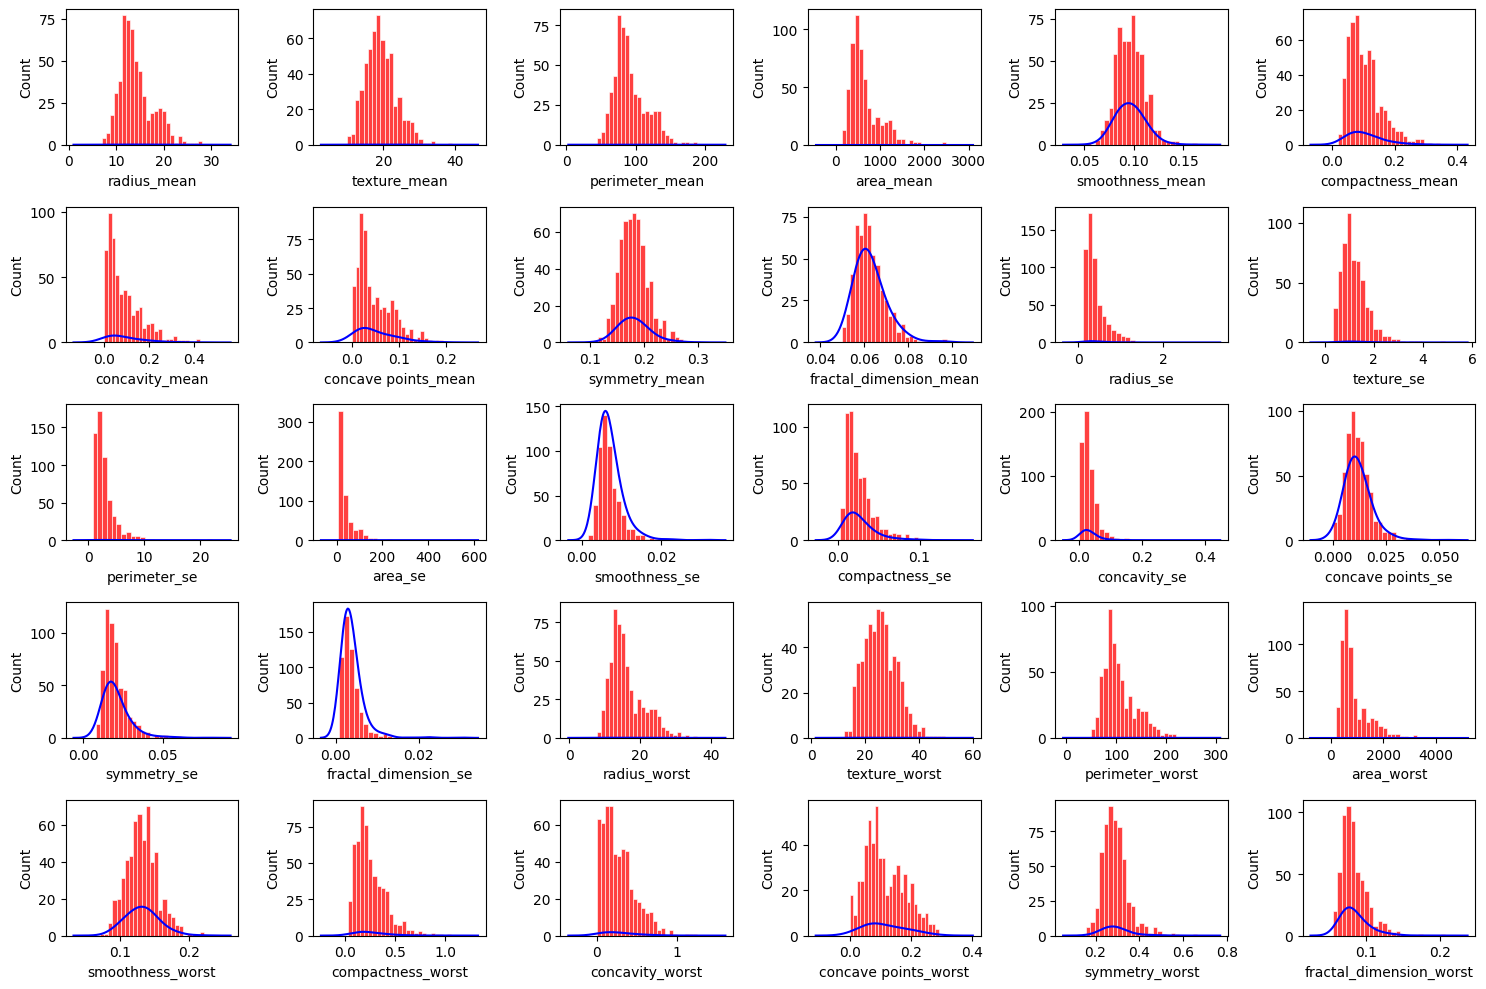

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15, 10))

for i, col in enumerate(q[1:]):
    sns.histplot(data=data, x=col, color='red', edgecolor='white', ax=axes[i//6][i%6], bins=25)
    sns.kdeplot(data=data, x=col, color='blue', ax=axes[i//6][i%6], bw_adjust=2)

plt.tight_layout()
plt.show()


**Corelation of the data set**

In [17]:
corrmat = data.corr()
corrmat

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_16464\563200516.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [18]:
# create the heatmap
e =go.Heatmap(x=corrmat.columns, y=corrmat.index, z=corrmat.values, colorscale='electric')

fig = go.Figure(data= e)

fig.update_layout(width=600, height=600, margin=dict(l=50, r=50, b=100, t=100), template='plotly_white')

# set the title and axis labels
fig.update_layout(title='Correlation Matrix', xaxis_title='Features', yaxis_title='Features')

# show the plot
fig.show()

**Plotting the each pair of features in the data sets to identify the linearity** 

In [19]:
columns = list(data.columns)

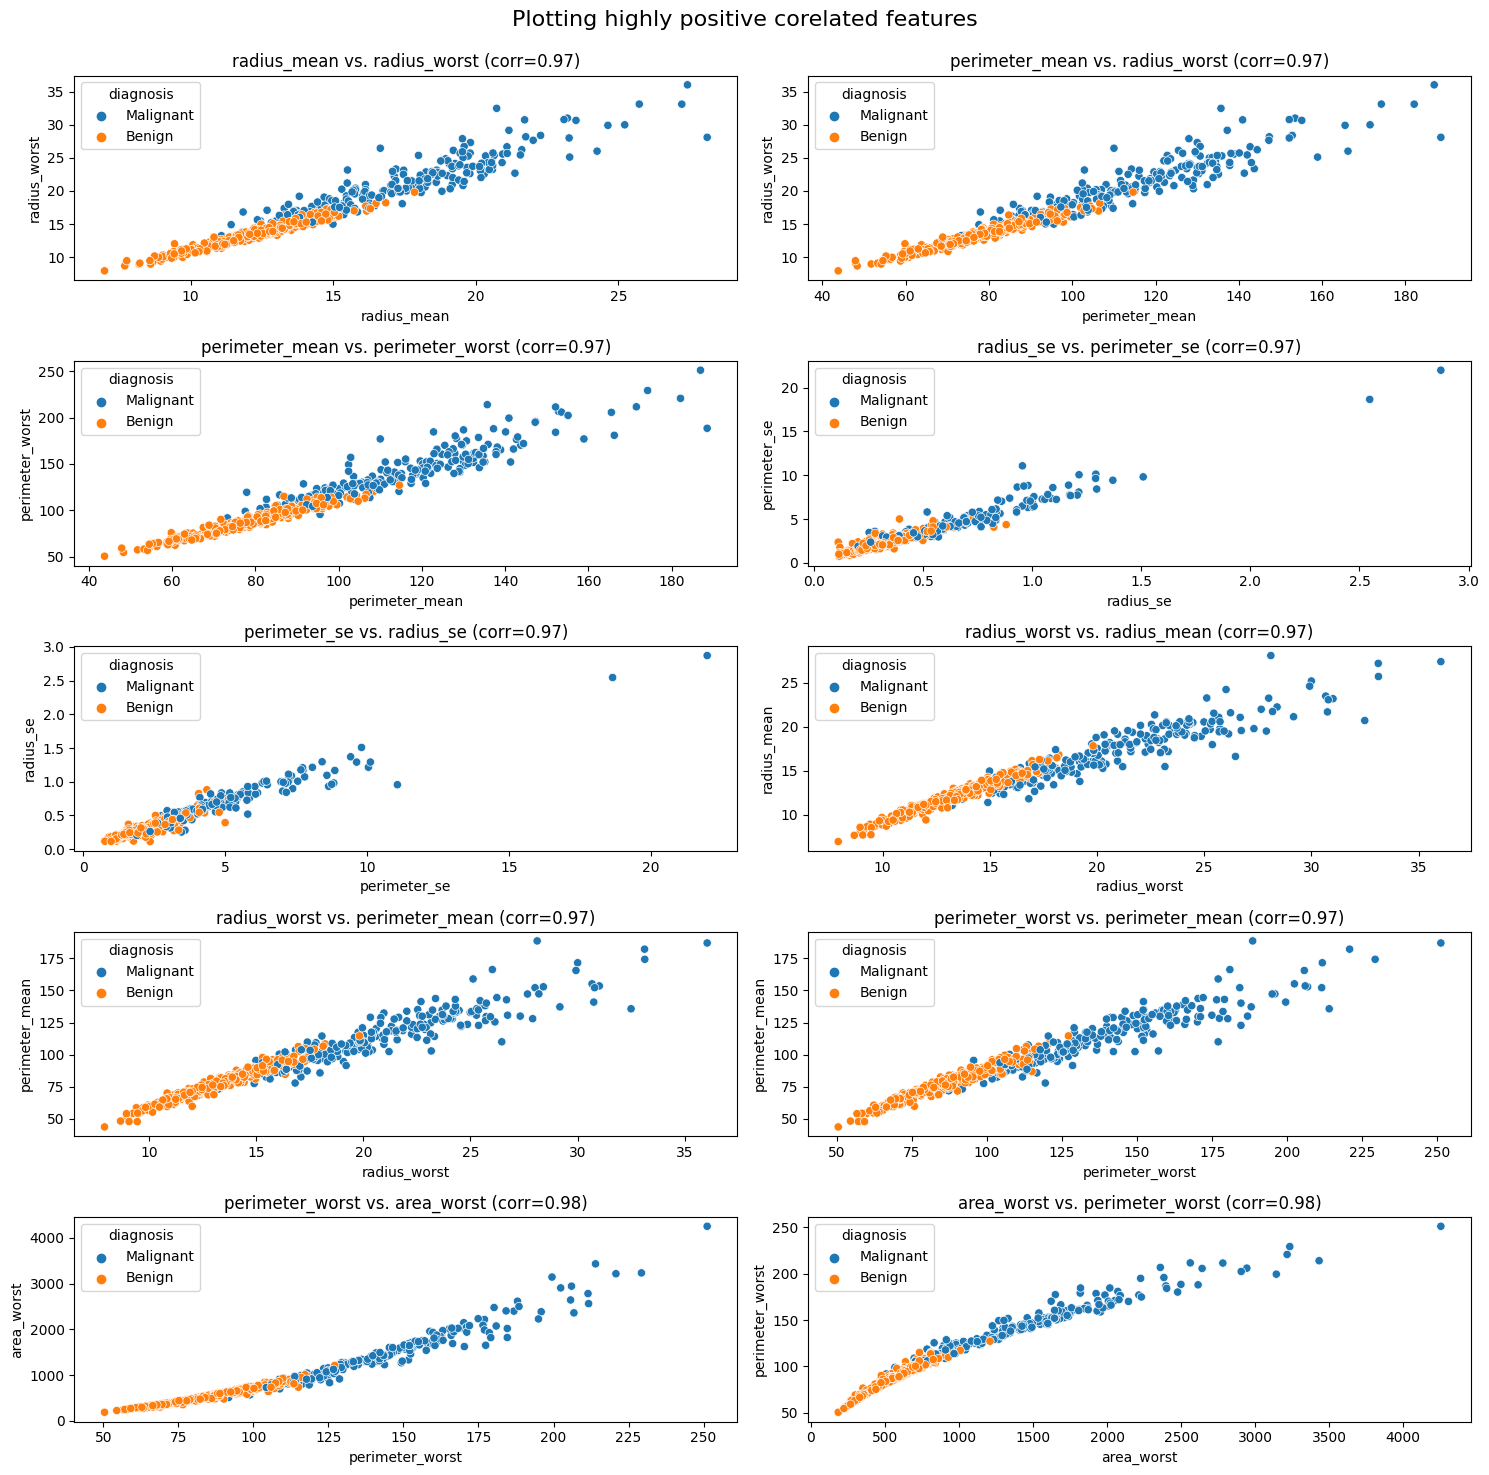

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
c=0
for i in columns:
  for j in columns:
    if i != 'diagnosis' and j != 'diagnosis':
      if corrmat[i][j] > 0.967 and corrmat[i][j] < 0.98:
        axes = axes.ravel()

        sns.scatterplot(data=data, x=i, y=j, hue='diagnosis', ax=axes[c])
        c+=1
        
        # set the x-axis label
        axes[c-1].set_xlabel(i)

        # set the y-axis label
        axes[c-1].set_ylabel(j)

        # set the title
        axes[c-1].set_title(f"{i} vs. {j} (corr={corrmat[i][j]:.2f})")

# set a common title for all subplots
fig.suptitle('Plotting highly positive corelated features\n', fontsize=16)

# adjust the layout of the subplots
fig.tight_layout()
# show the plot
plt.show()

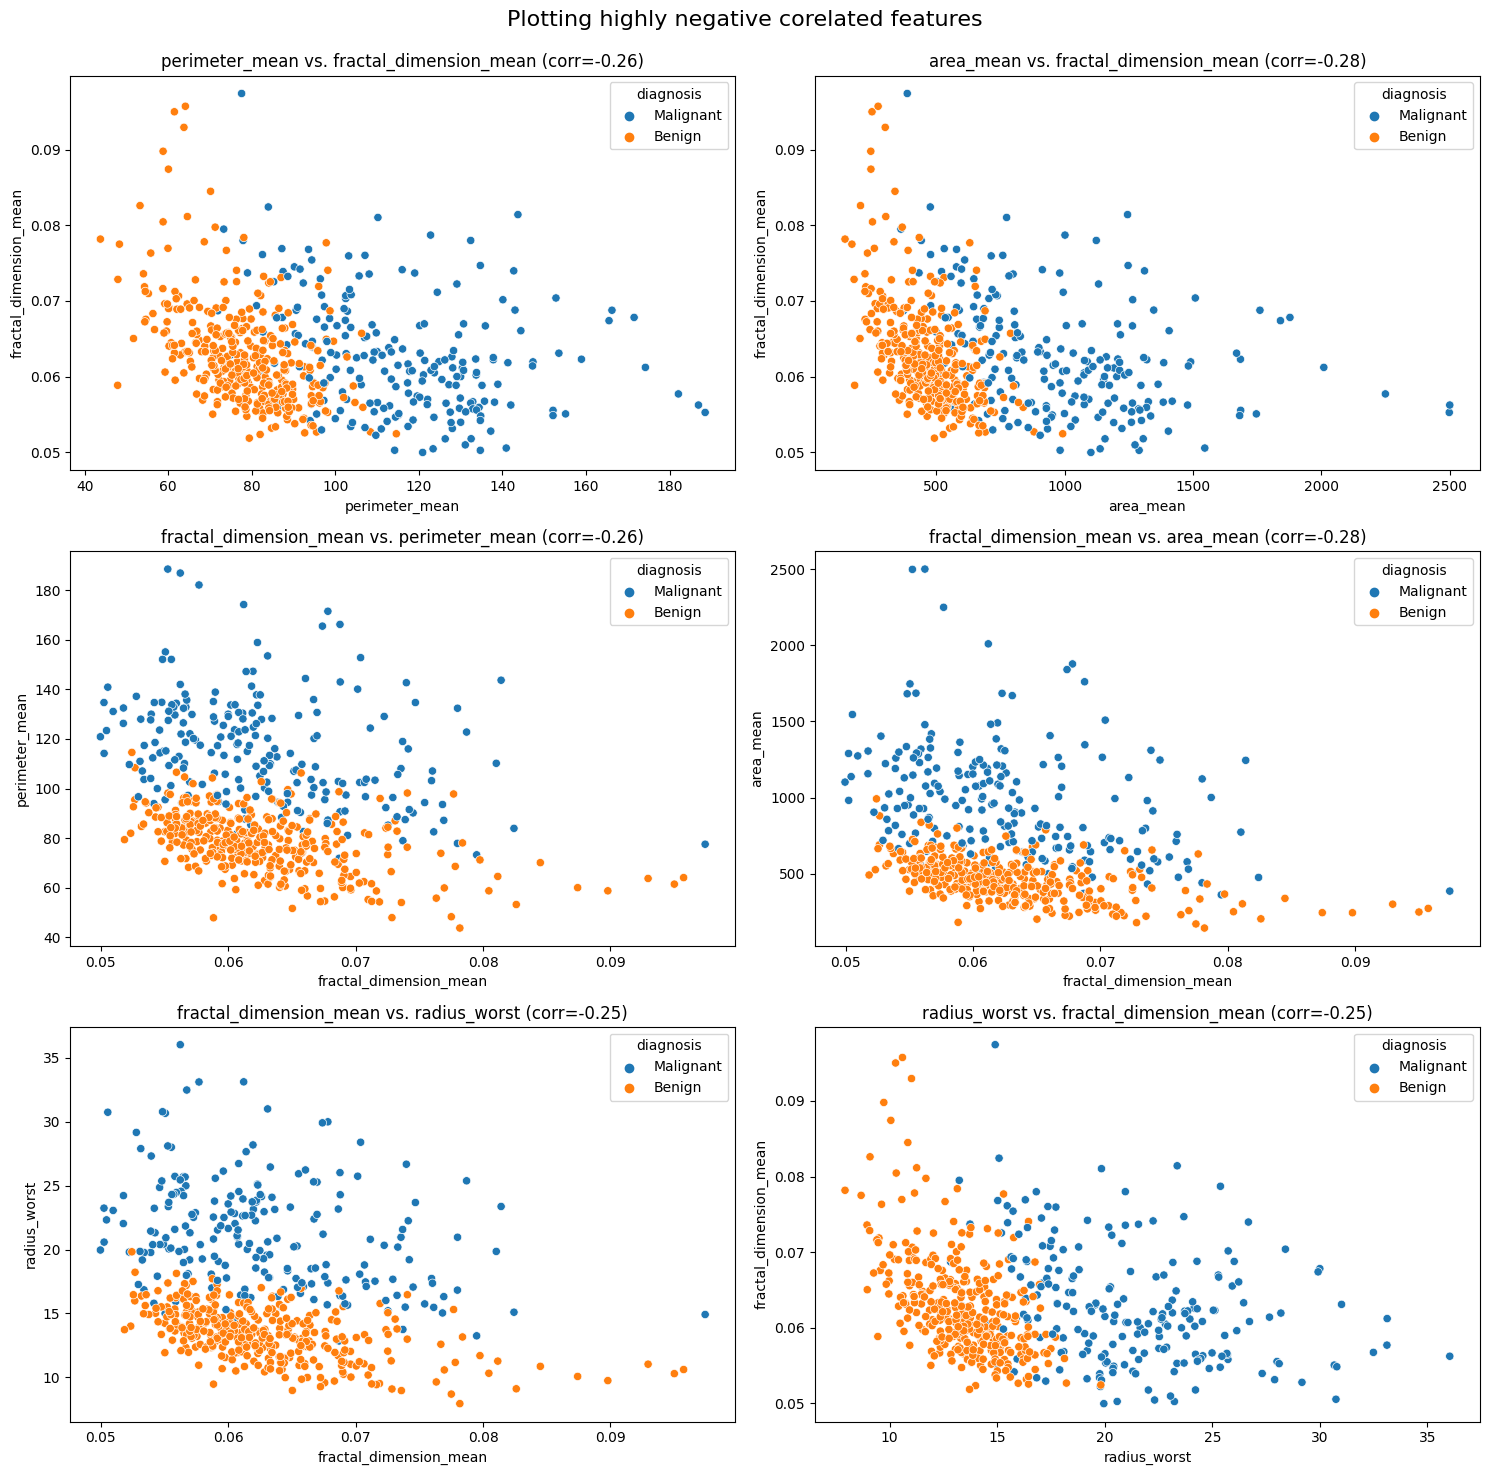

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
c=0
for i in columns:
  for j in columns:
    if i != 'diagnosis' and j != 'diagnosis':
      if corrmat[i][j] < -0.25 and corrmat[i][j] > -0.3:
        axes = axes.ravel()

        sns.scatterplot(data=data, x=i, y=j, hue='diagnosis', ax=axes[c])
        c+=1
        
        # set the x-axis label
        axes[c-1].set_xlabel(i)

        # set the y-axis label
        axes[c-1].set_ylabel(j)

        # set the title
        axes[c-1].set_title(f"{i} vs. {j} (corr={corrmat[i][j]:.2f})")

# set a common title for all subplots
fig.suptitle('Plotting highly negative corelated features\n', fontsize=16)

# adjust the layout of the subplots
fig.tight_layout()
# show the plot
plt.show()

# Resampling the imbalanced dataset


In [22]:
data["diagnosis"]=data["diagnosis"].apply(lambda x: int(1) if (x=='Malignant') else int(0))

In [23]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data

oversampled_X, oversampled_Y = sm.fit_resample(data.drop('diagnosis', axis=1), data['diagnosis'])

In [24]:
#from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler class

#undersampler = RandomUnderSampler(sampling_strategy='majority')

# Down-sample the majority class

#X_resampled, y_resampled = undersampler.fit_resample(data.drop('diagnosis', axis=1), data['diagnosis'])

In [25]:
type(oversampled_Y)

pandas.core.series.Series

In [26]:
# creating new data set with over sampling the minority class

sample = pd.concat([oversampled_X, oversampled_Y], axis=1)

sample.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1


In [27]:
sample.shape

(714, 31)

In [28]:
counts = sample.diagnosis.value_counts()

fig = px.bar(counts, x=counts.values, y=counts.index, orientation='h', color = counts.index)
fig.update_layout(width=800, height=350)

# Set the chart title and axis labels
fig.update_layout(title='Diagnosis Value Counts', xaxis_title='Count', yaxis_title='[ B Bening, M Malignant]')

# Show the chart
fig.show()

# Check for the outliers

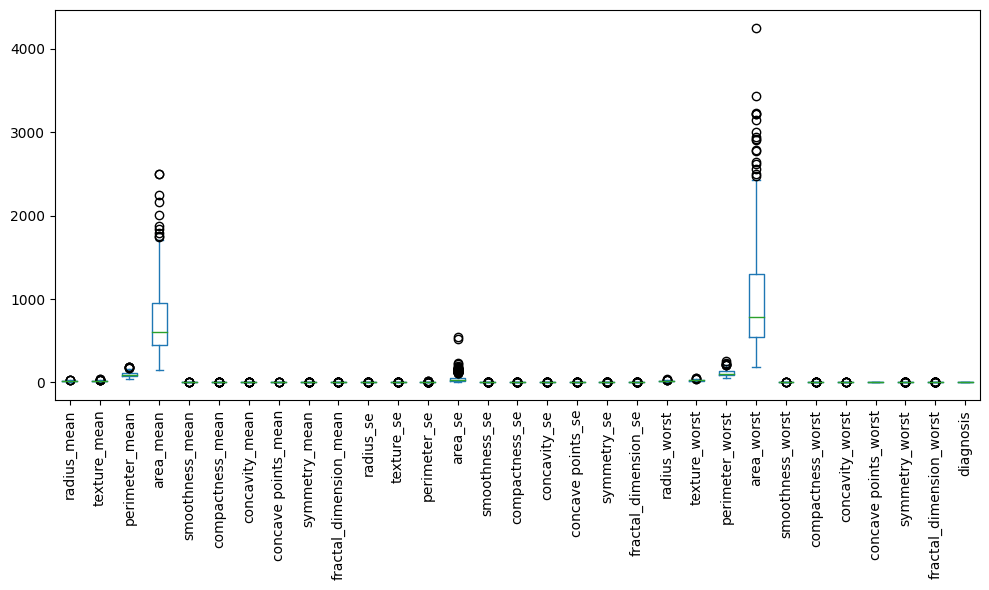

In [29]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = sample.plot(kind='box')

# Set x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.show()

# Scalling 

In [30]:
X_fi = StandardScaler().fit_transform(sample.drop('diagnosis', axis=1))

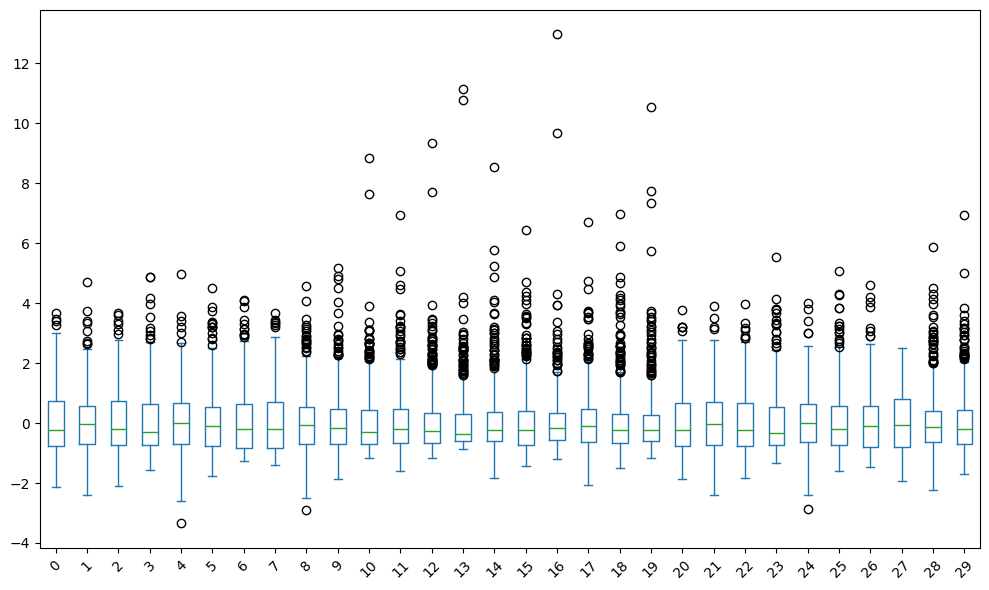

In [31]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe

z=pd.DataFrame(X_fi)
ax = z.plot(kind='box')

# Set x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the plot
plt.show()

All the outliar may be reason for the large cancer tumors

# Find the important feautures

In [32]:
y_fi = sample['diagnosis']   #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_fi,y_fi)

ExtraTreesClassifier()

In [33]:
columns = list(sample.columns)
for i,j in zip(model.feature_importances_,columns[:-1]):
  print(i,j)

0.038345600703953084 radius_mean
0.019359274250142455 texture_mean
0.05244507080003492 perimeter_mean
0.05820129015095445 area_mean
0.007763250226678779 smoothness_mean
0.025695395254083563 compactness_mean
0.08753117221194345 concavity_mean
0.07851914281463036 concave points_mean
0.008088793807288525 symmetry_mean
0.0076115428833611245 fractal_dimension_mean
0.0240900859866368 radius_se
0.005706075892774004 texture_se
0.022598148954027807 perimeter_se
0.02462789012335818 area_se
0.006110523331632442 smoothness_se
0.007565350619711452 compactness_se
0.008025635392738761 concavity_se
0.010464203124112519 concave points_se
0.00807972259967522 symmetry_se
0.005989021213928573 fractal_dimension_se
0.09617968009346224 radius_worst
0.0310883969777075 texture_worst
0.06105660041907999 perimeter_worst
0.06945748883718478 area_worst
0.021358741825078194 smoothness_worst
0.018735329147029644 compactness_worst
0.04017741186531962 concavity_worst
0.13554337475450173 concave points_worst
0.01256365

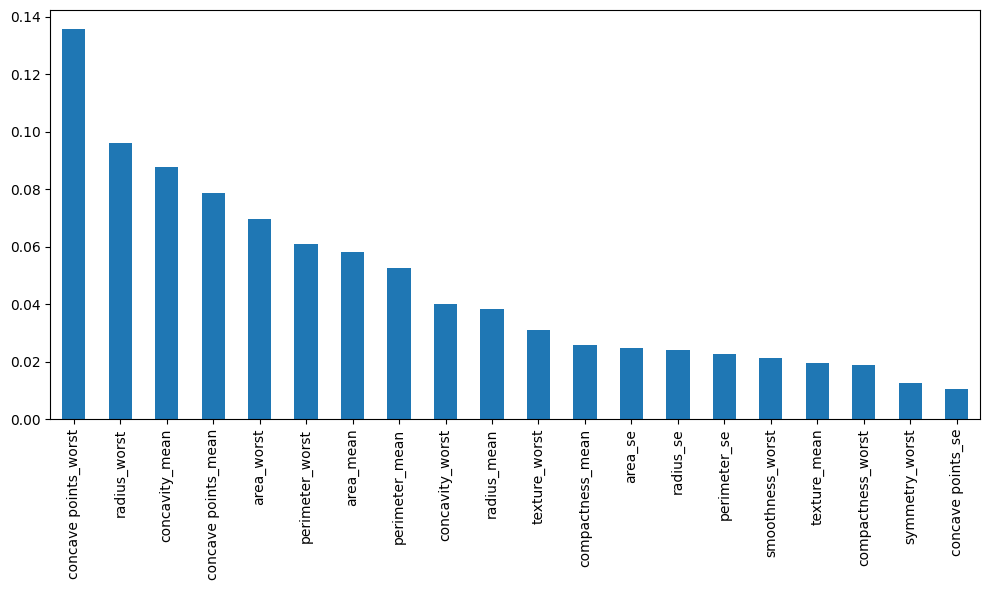

In [34]:
feat_importances = pd.Series(model.feature_importances_, index=columns[:-1])
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

In [35]:
#feat_imp = [i for i in feat_importances.nlargest(10).index if i.split('_')[1] == 'worst']

In [36]:
feat_imp = list(feat_importances.nlargest(10).index)
feat_imp

['concave points_worst',
 'radius_worst',
 'concavity_mean',
 'concave points_mean',
 'area_worst',
 'perimeter_worst',
 'area_mean',
 'perimeter_mean',
 'concavity_worst',
 'radius_mean']

In [37]:
feat_imp.append('diagnosis')

## Creating a data sets with important features

In [38]:
df = sample[feat_imp]

In [39]:
df.head(1)

,concave points_worst,radius_worst,concavity_mean,concave points_mean,area_worst,perimeter_worst,area_mean,perimeter_mean,concavity_worst,radius_mean,diagnosis
0,0.2654,25.38,0.3001,0.1471,2019.0,184.6,1001.0,122.8,0.7119,17.99,1


In [62]:
# Save the DataFrame to a CSV file

df.to_csv('_final_data.csv', index=False)

# Ml Model

## Spliting train and test data

In [41]:
#Split my data
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]].values, df['diagnosis'].values, test_size=0.2, random_state=0)

## Scalling

In [42]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

## SVM Classifier

In [43]:
# Train a linear SVM model using a radial basis function (RBF) kernel

svm = SVC(kernel='linear', gamma='scale', random_state=0, probability=True)

svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

**save the model to used in streamlit application**

In [63]:
# Saving the model

pickle.dump(svm, open('cancer_diagnosis.pkl', 'wb'))

In [45]:
# Make predictions on the train data

y_svm_train_pred = svm.predict(x_train)
y_svm_train_prob = svm.predict_proba(x_train)


Accuracy: 95.10%

F1 Score: 0.95

AUC Score: 0.99


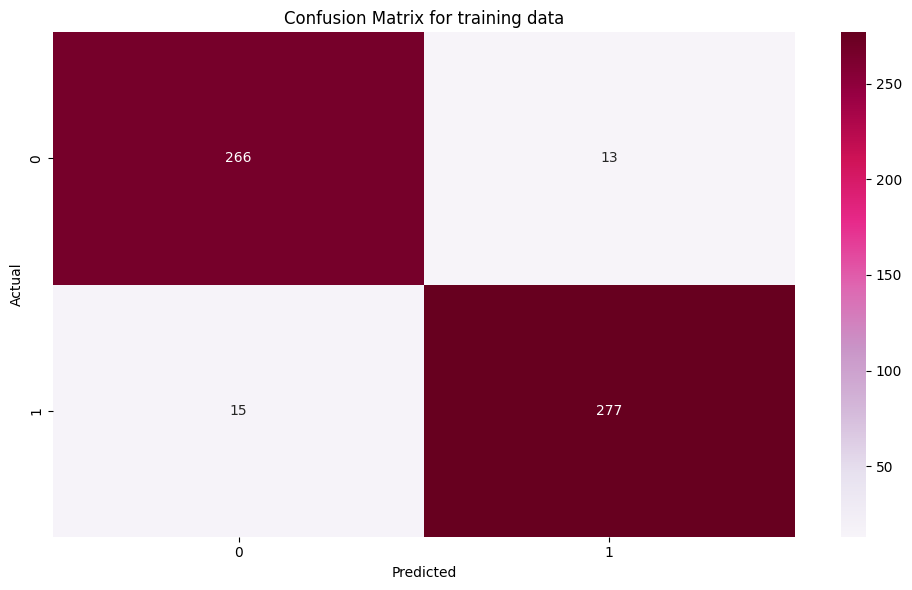

In [46]:
# Evaluate the model's accuracy on the test data

acc = accuracy_score(y_train, y_svm_train_pred)

f1 = f1_score(y_train, y_svm_train_pred, average='macro')

cm = confusion_matrix(y_train, y_svm_train_pred)

auc = roc_auc_score(y_train, y_svm_train_prob[:,1])


print("\nAccuracy: {:.2f}%".format(acc * 100))
print("\nF1 Score: {:.2f}".format(f1))
print("\nAUC Score: {:.2f}".format(auc))

sns.heatmap(cm, annot=True, cmap="PuRd", fmt='g')
# set the x-axis label
plt.xlabel("Predicted")

# set the y-axis label
plt.ylabel("Actual")

# set the title
plt.title("Confusion Matrix for training data")

# show the plot
plt.show()

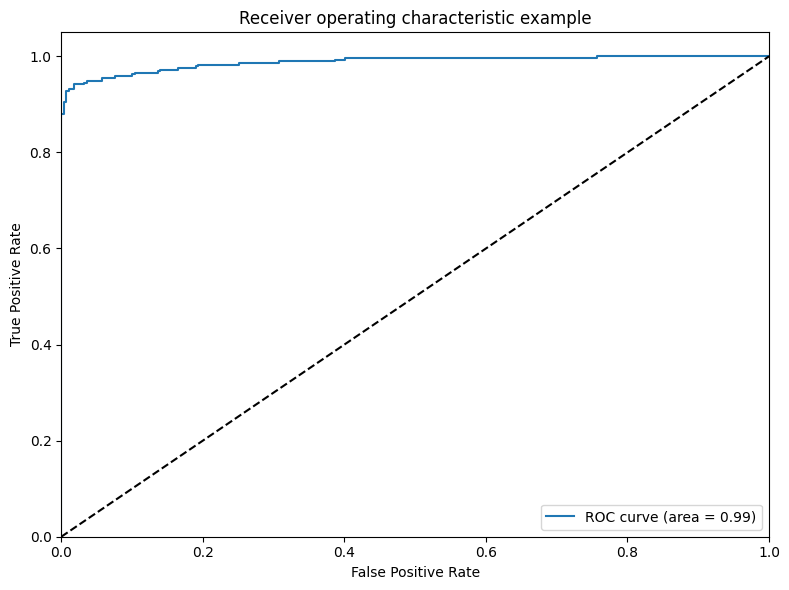

In [47]:
# Plot the ROC curve and calculate the AUC score on the test data
fpr, tpr, thresholds = roc_curve(y_train, y_svm_train_prob[:,1], pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Predict the test data

In [48]:
# Make predictions on the test data

y_svm_test_pred = svm.predict(x_test)
y_svm_test_prob = svm.predict_proba(x_test)


Accuracy: 95.80%

F1 Score: 0.96

AUC Score: 1.00


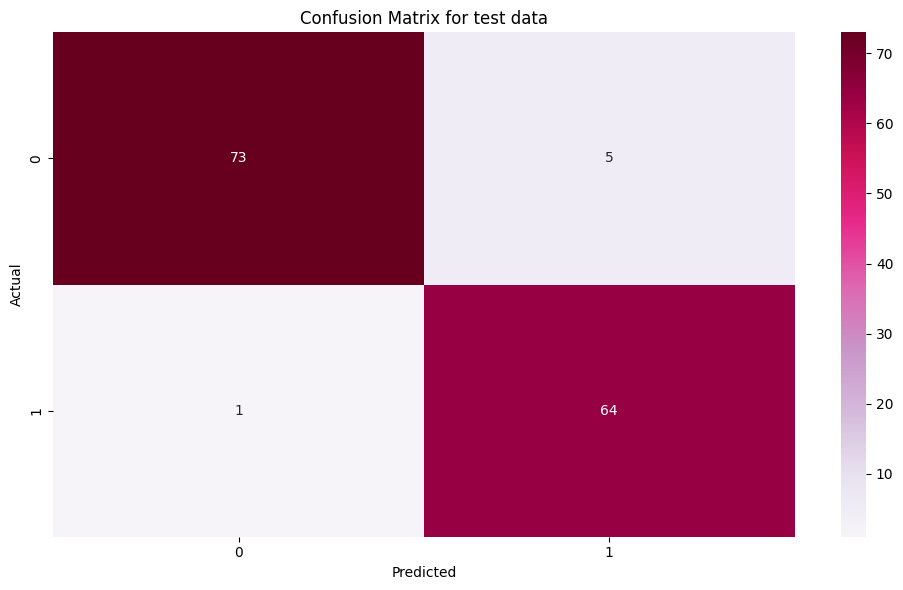

In [49]:
# Evaluate the model's accuracy on the test data

acc = accuracy_score(y_test, y_svm_test_pred)
f1 = f1_score(y_test, y_svm_test_pred, average='macro')
cm = confusion_matrix(y_test, y_svm_test_pred)
auc = roc_auc_score(y_test, y_svm_test_prob[:,1])


print("\nAccuracy: {:.2f}%".format(acc * 100))
print("\nF1 Score: {:.2f}".format(f1))
print("\nAUC Score: {:.2f}".format(auc))

sns.heatmap(cm, annot=True, cmap="PuRd", fmt='g')
# set the x-axis label
plt.xlabel("Predicted")

# set the y-axis label
plt.ylabel("Actual")

# set the title
plt.title("Confusion Matrix for test data")

# show the plot
plt.show()

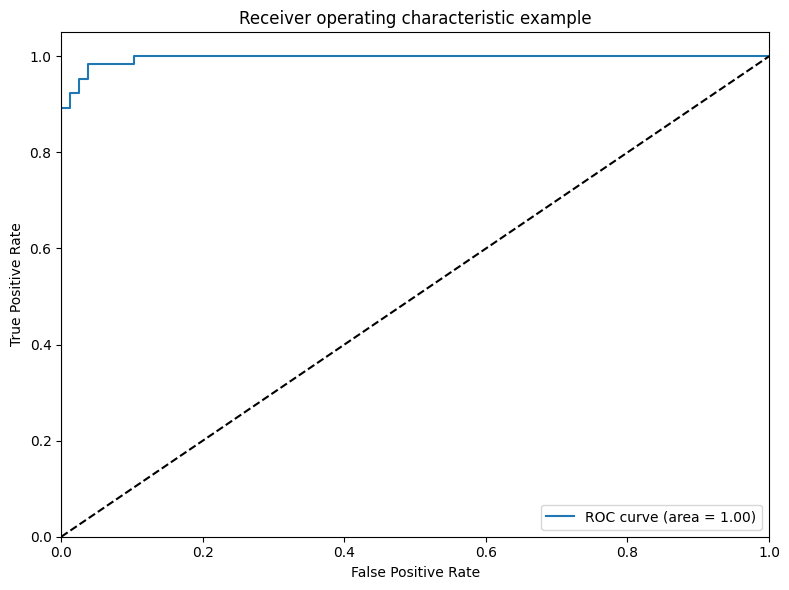

In [50]:
# Plot the ROC curve and calculate the AUC score on the test data

fpr, tpr, thresholds = roc_curve(y_test, y_svm_test_prob[:,1], pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Predict the diagnosis with new sample data points

In [51]:
df.loc[0]

concave points_worst       0.2654
radius_worst              25.3800
concavity_mean             0.3001
concave points_mean        0.1471
area_worst              2019.0000
perimeter_worst          184.6000
area_mean               1001.0000
perimeter_mean           122.8000
concavity_worst            0.7119
radius_mean               17.9900
diagnosis                  1.0000
Name: 0, dtype: float64

In [52]:
df.loc[19]

concave points_worst      0.12880
radius_worst             15.11000
concavity_mean            0.06664
concave points_mean       0.04781
area_worst              711.20000
perimeter_worst          99.70000
area_mean               566.30000
perimeter_mean           87.46000
concavity_worst           0.23900
radius_mean              13.54000
diagnosis                 0.00000
Name: 19, dtype: float64

In [53]:
# type benign

sample_data0 = list(df.loc[19][:-1])

In [54]:
# type malignant 

sample_data1 = list(df.loc[0][:-1])

In [55]:
def predicting(z):
  X = std.transform(np.array(z).reshape(1, -1))
  if svm.predict(X) == 1:
    print("Malignant")
  else:
    print("Bening")

In [56]:
k= [sample_data0, sample_data1]

for i in k:
  predicting(i)

Bening
Malignant
